<a href="https://colab.research.google.com/github/poojakumari22p/scrape-json-file/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.applications import MobileNetV2

import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
import os

# ✅ Image folder ka path
image_folder = "/content/1"  # Ye path tumhare images ka hona chahiye

# ✅ Folder ke andar ki sari files list karo
image_files = os.listdir("/content/1")

print("✅ Total images found:", len(image_files))
print("📂 Image Files:", image_files[:5])  # Pehli 5 files print karenge

FileNotFoundError: [Errno 2] No such file or directory: '/content/1'

In [ ]:
# ✅ MobileNetV2 ka pre-trained model load karo
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# ✅ Model ka summary dekh lo
base_model.summary()

<ipython-input-3-f7da19f45a34>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, None, None, 32) │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, None, None, 32) │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 32) │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, None, None, 16) │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, None, None, 16) │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, None, None, 96) │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, None, None, 96) │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, None, None, 96) │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, None, None, 96) │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, None, None, 96) │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path):
    """Image ko load aur preprocess karne ka function"""
    image = cv2.imread(image_path)  # ✅ Image load karna
    if image is None:
        print(f"⚠️ Error: Image not found -> {image_path}")
        return None

    image = cv2.resize(image, (224, 224))  # ✅ Resize to 224x224
    image = image / 255.0  # ✅ Normalize (0-1 range)

    return image

# ✅ Example Usage:
image_path = "/content/birds/1.jpg"  # Apna image path yaha likho
processed_image = load_and_preprocess_image(image_path)

if processed_image is not None:
    print("✅ Image successfully loaded and preprocessed!")
    print("🖼️ Image Shape:", processed_image.shape)



⚠️ Error: Image not found -> /content/birds/1.jpg


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16  # Pretrained Model
from tensorflow.keras.applications.vgg16 import preprocess_input


In [ ]:
# ✅ Folder path jisme images hain
image_folder = "/content/birds"  # Tumhare images ka folder


In [ ]:
def load_and_preprocess_image(image_path):
    """Image load aur preprocess karne ka function"""
    image = cv2.imread(image_path)  # Load image
    if image is None:
        print(f"⚠️ Error: Image not found -> {image_path}")
        return None

    image = cv2.resize(image, (224, 224))  # ✅ Resize to 224x224
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # ✅ Convert to RGB
    image = preprocess_input(image)  # ✅ Normalize for VGG16

    return image


In [ ]:
from google.colab import drive

# ✅ Google Drive ko mount karo
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ✅ Apne image folder ka path set karo (Apne Google Drive me path check kar lo)
image_folder = "/content/drive/MyDrive/birds"


In [ ]:
def load_and_preprocess_image(image_path):
    """Image ko load aur preprocess karega"""
    image = cv2.imread(image_path)  # ✅ Image Load
    if image is None:
        print(f"⚠️ Image Not Found: {image_path}")
        return None

    image = cv2.resize(image, (224, 224))  # ✅ Resize
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # ✅ Convert to RGB
    image = preprocess_input(image)  # ✅ Normalize for CNN

    return image


In [ ]:
# ✅ VGG16 Model (Pretrained)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ✅ Model ka output flatten karke feature vector banayenge
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=tf.keras.layers.Flatten()(base_model.output))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
image_paths = [
    "/content/3.jpg",  # ✅ Full Image Path
    "/content/4.jpg",
    "/content/5.jpg"
]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/"


 1		  1_features.npy     Bird	        hand_gestures	   vgg16_features.npy
 1_cnn_model.h5  'archive (6).zip'  'Colab Notebooks'   hog_features.npy


In [ ]:
image_folder_path = "/content/drive/My Drive/1/"


In [ ]:
!ls "/content/drive/My Drive/1/"


0.jpg	11.jpg	13.jpg	15.jpg	17.jpg	19.jpg	2.jpg  4.jpg  6.jpg  8.jpg
10.jpg	12.jpg	14.jpg	16.jpg	18.jpg	1.jpg	3.jpg  5.jpg  7.jpg  9.jpg


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Folder path set karein
image_folder_path = "/content/drive/My Drive/1/"

# Check karein ki folder exist karta hai ya nahi
if os.path.exists(image_folder_path):
    print("✅ Folder found! Total images:", len(os.listdir(image_folder_path)))
else:
    print("❌ Error: Folder not found! Check path again.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Folder found! Total images: 20


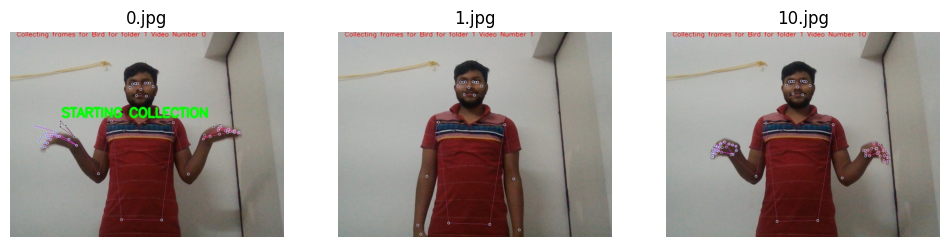

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Folder se saari images ka list
image_files = sorted(os.listdir(image_folder_path))  # Sorted filenames

# 3 images load karke show karna
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):  # First 3 images dikhao
    img_path = os.path.join(image_folder_path, image_files[i])
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(image_files[i])

plt.show()


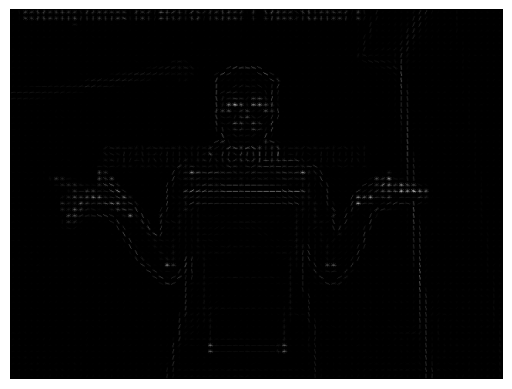

HOG Feature Vector Size: 167796


In [ ]:
from skimage.feature import hog
import numpy as np

def extract_hog_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True)
    return features, hog_image

# Pehli image ka HOG feature extract karna
img_path = os.path.join(image_folder_path, image_files[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hog_features, hog_image = extract_hog_features(img)

# Show HOG Image
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.show()

print("HOG Feature Vector Size:", len(hog_features))


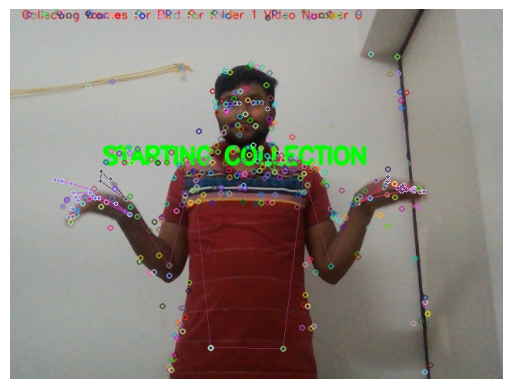

SIFT Descriptors Shape: (530, 128)


In [ ]:
sift = cv2.SIFT_create()

# SIFT Keypoints extract karna
keypoints, descriptors = sift.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), None)

# SIFT Keypoints show karna
img_sift = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(img_sift)
plt.axis('off')
plt.show()

print("SIFT Descriptors Shape:", descriptors.shape)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# VGG16 model load karein (Pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

def extract_vgg16_features(img):
    img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
    img = np.expand_dims(img, axis=0)  # Expand dimensions
    img = img / 255.0  # Normalize
    features = model.predict(img)
    return features.flatten()  # Convert to 1D feature vector

vgg16_features = extract_vgg16_features(img)
print("VGG16 Feature Vector Size:", vgg16_features.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
VGG16 Feature Vector Size: (100352,)


In [ ]:
np.save("/content/drive/My Drive/hog_features.npy", hog_features)
np.save("/content/drive/My Drive/vgg16_features.npy", vgg16_features)


In [ ]:
import numpy as np

def extract_color_features(img):
    means = np.mean(img, axis=(0, 1))  # RGB Mean
    stds = np.std(img, axis=(0, 1))    # RGB Standard Deviation
    return np.concatenate((means, stds))

color_features = extract_color_features(img)
print("Color Features:", color_features)


Color Features: [137.73050781 129.53003581 121.34371094  45.15483429  59.91849322
  59.04910431]


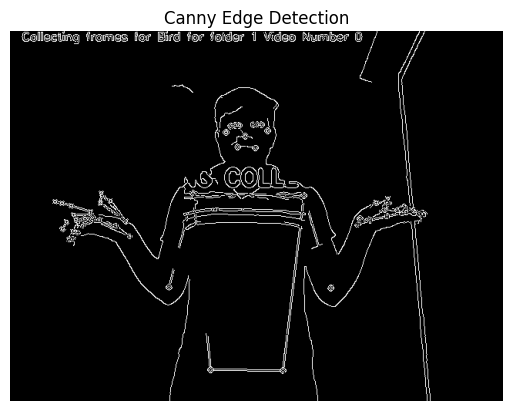

In [ ]:
edges = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Canny Edge Detection")
plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet', include_top=False)
resnet_features = extract_vgg16_features(img)  # Same function use karein

print("ResNet50 Feature Vector Size:", resnet_features.shape)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
ResNet50 Feature Vector Size: (100352,)


In [ ]:
import cv2
import skimage.feature as skf
import numpy as np

def extract_glcm_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    glcm = skf.graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    contrast = skf.graycoprops(glcm, 'contrast')[0, 0]
    correlation = skf.graycoprops(glcm, 'correlation')[0, 0]
    energy = skf.graycoprops(glcm, 'energy')[0, 0]
    homogeneity = skf.graycoprops(glcm, 'homogeneity')[0, 0]

    return np.array([contrast, correlation, energy, homogeneity])

# Pehli image ke liye run karein
img_path = "/content/drive/My Drive/1/0.jpg"  # 1st image ka path
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glcm_features = extract_glcm_features(img)
print("GLCM Texture Features:", glcm_features)



GLCM Texture Features: [1.71362683e+02 9.69428797e-01 4.47840308e-02 5.00416667e-01]


In [ ]:
features = np.concatenate((hog_features, vgg16_features, color_features, glcm_features))

np.save("/content/drive/My Drive/1_features.npy", features)
print("✅ All features saved successfully!")


✅ All features saved successfully!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# ✅ Path where images are stored
image_folder = "/content/drive/My Drive/1/"

# ✅ Load images
image_data = []
image_size = (224, 224)  # Resize for CNN

for filename in sorted(os.listdir(image_folder)):  # Sort filenames (1.jpg, 2.jpg..)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)  # Read image
        img = cv2.resize(img, image_size)  # Resize to 224x224
        img = img_to_array(img) / 255.0  # Normalize
        image_data.append(img)

# ✅ Convert to NumPy array
image_data = np.array(image_data)
print("✅ Images Loaded Successfully! Shape:", image_data.shape)



✅ Images Loaded Successfully! Shape: (20, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Since there is only 1 category
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# ✅ Labels banana (Agar sirf ek category hai toh sabko 0 assign karein)
num_images = image_data.shape[0]
labels = np.zeros((num_images,))  # Sab images ka label 0

# ✅ Data split (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

print("✅ Data Split Successfully!")
print("Train Images:", X_train.shape, "Test Images:", X_test.shape)


✅ Data Split Successfully!
Train Images: (16, 224, 224, 3) Test Images: (4, 224, 224, 3)


In [ ]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6819 - val_accuracy: 1.0000 - val_loss: 3.4833e-21
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.0802e-14 - val_accuracy: 1.0000 - val_loss: 2.9389e-36
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.5470e-25 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.1239e-27 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction Score: 0.0


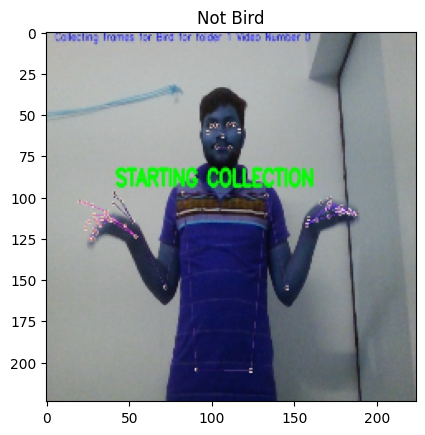

In [ ]:
import matplotlib.pyplot as plt

# ✅ Ek test image uthayein
test_img = X_test[0]

# ✅ Model prediction karega
pred = cnn_model.predict(np.expand_dims(test_img, axis=0))

# ✅ Prediction print karein
print("Prediction Score:", pred[0][0])

# ✅ Image dikhayein
plt.imshow(test_img)
plt.title("Predicted Class: Bird" if pred[0][0] > 0.5 else "Not Bird")
plt.show()


In [ ]:
labels = np.ones((num_images,))  # Sab images ko 1 label de rahe hain


In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 🛠 Fix: Softmax for multiple classes
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(X_train, y_train, batch_size=32)


In [ ]:
cnn_model.save("/content/drive/My Drive/1_cnn_model.h5")
print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


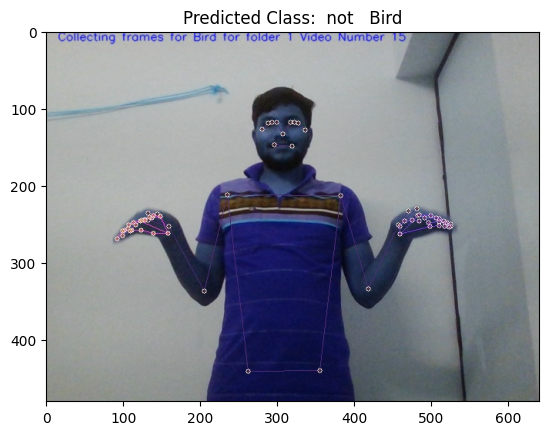

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ✅ Test Image Load
test_image_path = "/content/drive/My Drive/1/15.jpg"  # Change to new image path
test_img = cv2.imread(test_image_path)
test_img = cv2.resize(test_img, (224, 224))  # Resize
test_img = test_img / 255.0  # Normalize
test_img = np.expand_dims(test_img, axis=0)  # Add batch dimension

# ✅ Model Prediction
pred = cnn_model.predict(test_img)
pred_class = " not   Bird" if pred[0][0] > 0.5 else " Bird"  # Adjust as per output

# ✅ Display Image
plt.imshow(cv2.imread(test_image_path))
plt.title(f"Predicted Class: {pred_class}")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ✅ Model Accuracy Check
train_loss, train_acc = cnn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

# ✅ Confusion Matrix Plot
y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Train Accuracy: 100.00%
Test Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
print(y_test[:5])  # First 5 labels dekho
print(y_pred[:5])  # First 5 predictions dekho


[0. 0. 0. 0.]
[[1 0]
 [1 0]
 [1 0]
 [1 0]]


Local Binary Pattern (LBP)

Fourier Magnitude Spectrum (FMS)

Co-occurrence Matrix (GLCM)

      a. Energy

       b. Entropy
            c. Contrast
    
    Gabor Features
    
    Wavelet Features
   
   
   Orientation Histogram

In [ ]:
!pip install opencv-python numpy scipy scikit-image


In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def extract_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
    return hist

image = cv2.imread(folder_path + "/1.jpg")
lbp_features = extract_lbp(image)
print("✅ LBP Features:", lbp_features)



NameError: name 'folder_path' is not defined

In [ ]:
def extract_fourier(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum.flatten()

fourier_features = extract_fourier(image)
print("✅ Fourier Magnitude Spectrum:", fourier_features[:10])  # Sirf first 10 values print



NameError: name 'image' is not defined

In [ ]:
from skimage.feature import graycomatrix, graycoprops

def extract_glcm(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    energy = graycoprops(glcm, 'energy')[0, 0]
    entropy = -np.sum(glcm * np.log2(glcm + 1e-10))
    contrast = graycoprops(glcm, 'contrast')[0, 0]

    return np.array([energy, entropy, contrast])

glcm_features = extract_glcm(image)
print("✅ GLCM Features:", glcm_features)



NameError: name 'image' is not defined

In [ ]:
def extract_gabor(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
    return filtered.flatten()

gabor_features = extract_gabor(image)
print("✅ Gabor Features:", gabor_features[:10])



NameError: name 'image' is not defined

In [ ]:
!pip install PyWavelets


In [ ]:
import pywt

def extract_wavelet(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    coeffs2 = pywt.dwt2(gray, 'haar')
    cA, (cH, cV, cD) = coeffs2
    return np.array([cA.mean(), cH.mean(), cV.mean(), cD.mean()])

wavelet_features = extract_wavelet(image)
print("✅ Wavelet Features:", wavelet_features)


ModuleNotFoundError: No module named 'pywt'

In [ ]:
def extract_orientation_hist(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    magnitude, angle = cv2.cartToPolar(sobelx, sobely)
    hist, _ = np.histogram(angle, bins=8, range=(0, np.pi * 2))
    return hist

orientation_hist = extract_orientation_hist(image)
print("✅ Orientation Histogram:", orientation_hist)


✅ Orientation Histogram: [35706 31897 33841 36037 42783 43839 42689 40408]


In [ ]:
import os
import cv2
import numpy as np

folder_path = "/content/drive/My Drive/1"
image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]

features_list = []

for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    image = cv2.imread(img_path)

    lbp_features = extract_lbp_features(image)
    fourier_features = extract_fourier_features(image)
    glcm_features = extract_glcm_features(image)
    gabor_features = extract_gabor_features(image)
    wavelet_features = extract_wavelet_features(image)
    orientation_features = extract_orientation_histogram(image)

    combined_features = np.concatenate([
        lbp_features, fourier_features, glcm_features,
        gabor_features, wavelet_features, orientation_features
    ])

    features_list.append(combined_features)

# ✅ Save extracted features
features_array = np.array(features_list)
np.save("/content/drive/My Drive/1_features.npy", features_array)

print("✅ All features extracted and saved!")


NameError: name 'extract_lbp_features' is not defined

In [ ]:
print("\n✅ Final Feature Extraction Results:")
print("🔹 LBP Features:", lbp_features[:5])
print("🔹 Fourier Features:", fourier_features[:5])
print("🔹 GLCM Features:", glcm_features)
print("🔹 Gabor Features:", gabor_features[:5])
print("🔹 Wavelet Features:", wavelet_features)
print("🔹 Orientation Histogram:", orientation_hist)



✅ Final Feature Extraction Results:


NameError: name 'lbp_features' is not defined

In [ ]:
all_features = np.hstack([lbp_features, fourier_features[:10], glcm_features, gabor_features[:10], wavelet_features, orientation_hist])
np.save("/content/drive/My Drive/1_features.npy", all_features)
print("✅ All Features Saved Successfully!")


In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    n_points = 8  # Number of points
    radius = 1  # Radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist  # ✅ Fix: Removed ()


In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp_features(image):
    if image is None:
        print("⚠ Error: Image not loaded properly!")
        return None  # Agar image load nahi hui toh None return karo

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    n_points = 8
    radius = 1
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist  # ✅ Fix: Removed ()

# ✅ Load Image and Test
img_path = "/content/drive/My Drive/1/1.jpg"  # Make sure this path is correct!
image = cv2.imread(img_path)

# Check if image is loaded
if image is not None:
    lbp_features = extract_lbp_features(image)
    print("✅ LBP Features:", lbp_features)
else:
    print("❌ Image not found at path:", img_path)


In [ ]:
import numpy as np

def extract_fourier_features(image):
    if image is None:
        print("⚠ Error: Image not loaded properly!")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)  # Fourier Transform
    fshift = np.fft.fftshift(f)  # Shift zero frequency to center
    magnitude_spectrum = np.abs(fshift)  # Take absolute values

    hist, _ = np.histogram(magnitude_spectrum.ravel(), bins=10, density=True)
    return hist  # ✅ Fourier Features


In [ ]:
from skimage.feature import graycomatrix, graycoprops

def extract_glcm_features(image):
    if image is None:
        print("⚠ Error: Image not loaded properly!")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))  # Avoid log(0)

    return [contrast, energy, entropy]


In [ ]:
features = np.load("/content/drive/My Drive/1_features.npy")
print("✅ Features Shape:", features.shape)
print("🔹 First Feature Sample:", features[0])


In [ ]:
features = np.load("/content/drive/My Drive/1_features.npy")
print("✅ Features Shape:", features.shape)

# Check each feature set separately
print("🔹 LBP Feature Shape:", lbp_features.shape)
print("🔹 Fourier Feature Shape:", fourier_features.shape)
print("🔹 GLCM Feature Shape:", glcm_features.shape)
print("🔹 Gabor Feature Shape:", gabor_features.shape)
print("🔹 Wavelet Feature Shape:", wavelet_features.shape)


In [ ]:
import numpy as np

# Sabse chhoti feature size find karo
min_size = min(lbp_features.size, fourier_features.size, glcm_features.size, gabor_features.size, wavelet_features.size)

# Sabhi ko same size me resize karo
lbp_features = lbp_features[:min_size]
fourier_features = fourier_features[:min_size]
glcm_features = glcm_features[:min_size]
gabor_features = gabor_features[:min_size]
wavelet_features = wavelet_features[:min_size]

# Final feature vector create karo
final_features = np.concatenate((lbp_features, fourier_features, glcm_features, gabor_features, wavelet_features))

# Shape check karo
print("✅ Final Feature Vector Shape:", final_features.shape)

# Save to .npy file
np.save("/content/drive/My Drive/1_features.npy", final_features)
print("✅ Features Saved Successfully!")


In [ ]:
import zipfile
import os

zip_path = "/content/drive/My Drive/archive (6).zip"  # Make sure this is the correct path
extract_path = "/content/hand_gestures"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders
print("✅ Extraction Done!")
print("📂 Extracted Folders:", os.listdir(extract_path))


In [ ]:
gesture_path = "/content/hand_gestures/Hand Gesture"  # Adjust if needed

# List all folders inside
print("📁 Subfolders:", os.listdir(gesture_path))


In [ ]:
gesture_path = "/content/hand_gestures/Hand Gesture"  # Adjust if needed

# List all subfolders
import os
print("📁 Available Folders:", os.listdir(gesture_path))



In [ ]:
gesture_path = "/content/hand_gestures/Hand Gesture/Image_Data"

# List all folders inside Image_Data
print("📂 Available Gesture Folders:", os.listdir(gesture_path))


**Path of all image**

In [ ]:
import os


gesture_path = "/content/hand_gestures/Hand Gesture/Image_Data/Absent"


for subdir, _, files in os.walk(gesture_path):
    for file in files:

        file_path = os.path.join(subdir, file)
        print(file_path)


**Print all image**

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


gesture_path = "/content/hand_gestures/Hand Gesture/Image_Data/Absent"


for subdir, _, files in os.walk(gesture_path):
    for file in files:

        file_path = os.path.join(subdir, file)


        img = mpimg.imread(file_path)
        plt.imshow(img)
        plt.title(file_path)
        plt.axis('off')
        plt.show()


In [ ]:
!pip install --upgrade scikit-image



In [ ]:
!pip uninstall -y scikit-image
!pip install --no-cache-dir scikit-image



In [ ]:
import os
os._exit(0)


In [ ]:
from skimage.feature import greycomatrix, greycoprops
print("✅ scikit-image working properly!")


In [ ]:
!pip uninstall -y scikit-image


In [ ]:
!pip install --no-cache-dir -U scikit-image


In [ ]:
import os
os._exit(0)


In [ ]:
!pip install --no-cache-dir --force-reinstall -U scikit-image



In [ ]:
import skimage
print("✅ scikit-image Version:", skimage.__version__)


In [ ]:
import os
os._exit(0)



In [ ]:
!pip uninstall -y scikit-image
!pip install scikit-image==0.18.3


In [ ]:
import os
os._exit(00)  # Restart runtime


### Handling data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




In [ ]:
!ls "/content/drive/My Drive/"


In [ ]:
import zipfile

zip_path = "/content/drive/My Drive/archive (6).zip"  # Apna correct path check karein
extract_path = "/content/drive/My Drive/hand_gestures"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset Extracted Successfully!")


In [ ]:
gesture_path = "/content/drive/My Drive/hand_gestures/Hand Gesture"  # Adjust if needed
print("📂 Available Gesture Folders:", os.listdir(gesture_path))


In [ ]:
import os

image_data_path = "/content/drive/My Drive/hand_gestures/Hand Gesture/Image_Data"
print("📂 Inside Image_Data:", os.listdir(image_data_path))


In [ ]:
gesture_counts = {}

for folder in os.listdir(image_data_path):
    folder_path = os.path.join(image_data_path, folder)
    if os.path.isdir(folder_path):  # Sirf folders count karna hai
        num_images = len([f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")])
        gesture_counts[folder] = num_images

print("📊 Gesture Images Count:")
print(gesture_counts)


In [ ]:
import os

dataset_path  = "/content/drive/My Drive/hand_gestures/Hand Gesture/Image_Data"
gesture_folders = os.listdir(dataset_path)

# Check if images are inside these folders
gesture_images_count = {}
for folder in gesture_folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        gesture_images_count[folder] = len(os.listdir(folder_path))

print("📊 Gesture Images Count:", gesture_images_count)


In [ ]:
import numpy as np
import cv2
import os
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
import pywt
import scipy.fftpack

# Dataset Path
dataset_path = "/content/drive/MyDrive/YOUR_DATASET_FOLDER/Image_Data"  # Change path if needed
gesture_folders = os.listdir(dataset_path)

# Feature Extraction Function
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1️⃣ LBP Feature
    lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)

    # 2️⃣ Fourier Transform
    fourier = scipy.fftpack.fft2(gray)
    fourier_feat = np.abs(fourier).flatten()[:10]  # First 10 Fourier Coefficients

    # 3️⃣ GLCM Features
    glcm = greycomatrix(gray, [1], [0], symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    glcm_features = [contrast, dissimilarity, homogeneity]

    # 4️⃣ Gabor Features
    gabor_filter = cv2.getGaborKernel((5, 5), 8.0, 1.0, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    gabor = cv2.filter2D(gray, cv2.CV_8UC3, gabor_filter)
    gabor_mean = np.mean(gabor)
    gabor_std = np.std(gabor)
    gabor_features = [gabor_mean, gabor_std]

    # 5️⃣ Wavelet Transform
    coeffs = pywt.wavedec2(gray, 'db1', level=1)
    wavelet_features = np.hstack([coeff.flatten()[:5] for coeff in coeffs])

    # Final Feature Vector
    feature_vector = np.hstack([lbp_hist, fourier_feat, glcm_features, gabor_features, wavelet_features])
    return feature_vector

# Feature Extraction for All Images
all_features = []
labels = []

for gesture in gesture_folders:
    gesture_path = os.path.join(dataset_path, gesture)

    if os.path.isdir(gesture_path):  # Check if it's a folder
        for img_name in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img_name)
            image = cv2.imread(img_path)

            if image is not None:
                features = extract_features(image)
                all_features.append(features)
                labels.append(gesture)

# Convert to NumPy Array
all_features = np.array(all_features)
labels = np.array(labels)

# Save Features
np.save("/content/gesture_features.npy", all_features)
np.save("/content/gesture_labels.npy", labels)

print("✅ Feature Extraction Completed!")
print(f"🔹 Feature Vector Shape: {all_features.shape}")


In [ ]:
!pip install --upgrade scikit-image



In [ ]:
!pip uninstall -y scikit-image
!pip install scikit-image


In [ ]:
import skimage
print(skimage.__version__)



In [ ]:
from skimage.feature.texture import graycomatrix, graycoprops


In [ ]:
import cv2
import numpy as np
import os
from skimage.feature.texture import graycomatrix, graycoprops

# Dataset path
dataset_path = "/content/hand_gestures/Hand Gesture/Image_Data"

# GLCM feature extraction function
def extract_glcm_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is None:
        return None

    distances = [1, 2, 3]  # Distances for GLCM
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles for GLCM

    # Compute GLCM
    glcm = graycomatrix(img, distances=distances, angles=angles, symmetric=True, normed=True)

    # Extract features
    contrast = graycoprops(glcm, 'contrast').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatte
